<a href="https://colab.research.google.com/github/Hamza1407/AnalyseTemp/blob/main/Clustering%20Heures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('/content/Join.csv')

In [3]:
X = df.drop(columns=['Heure','Jour','Mois','Année'])

In [4]:
scaler = MinMaxScaler()

X_standarized= df.drop(columns=['Heure','Jour','Mois','Année'])



for x in X_standarized.columns:
    col_to_normalize=X_standarized[x]
    col_to_normalize = col_to_normalize.values.reshape(-1, 1)

    col_to_normalize = scaler.fit_transform(col_to_normalize)
    X_standarized[x] = col_to_normalize

In [5]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X_standarized)
    cost.append(kmean.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

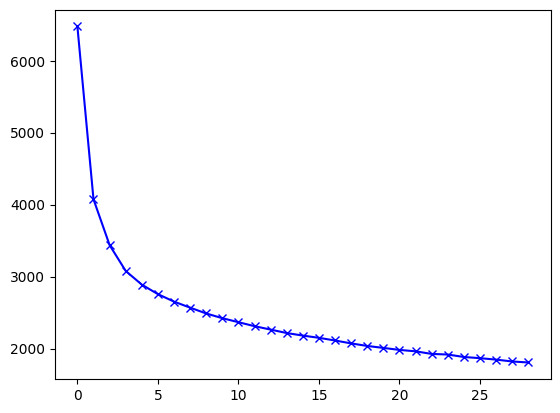

In [6]:
plt.plot(cost, 'bx-')

In [7]:
kmean= KMeans(3)
kmean.fit(X_standarized)
labels=kmean.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,Heure,Jour,Mois,Année,Indus4-1,College2-1,College2-4,Indus4-2,College2-3,College2-2,...,Indus8,College3,Indus1,AMTE4,Private5,College1-6,AMTE3,College1-1,Private2,cluster
0,0,1,1,2022,6000.0,884.0,139.0,6000.0,14166.666667,179.0,...,2000.000000,20500.000000,1583.333333,5500.0,511.0,145.0,65500.0,90.0,1685.0,0
1,0,1,2,2022,9500.0,210.0,230.0,10000.0,14500.000000,223.0,...,2000.000000,26500.000000,2083.333333,6000.0,1882.0,151.0,102500.0,90.0,2072.0,2
2,0,1,3,2022,20000.0,173.0,212.0,18500.0,12333.333333,193.0,...,2333.333333,24833.333333,2333.333333,5000.0,219.0,145.0,99000.0,90.0,1718.0,2
3,0,1,4,2022,34000.0,116.0,465.0,34000.0,15166.666667,209.0,...,2333.333333,26833.333333,2000.000000,5000.0,166.0,142.0,120000.0,93.0,1720.0,2
4,0,1,5,2022,27000.0,85.0,328.0,26000.0,11833.333333,197.0,...,1666.666667,20333.333333,1666.666667,2000.0,339.0,94.0,77500.0,93.0,216.0,0


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


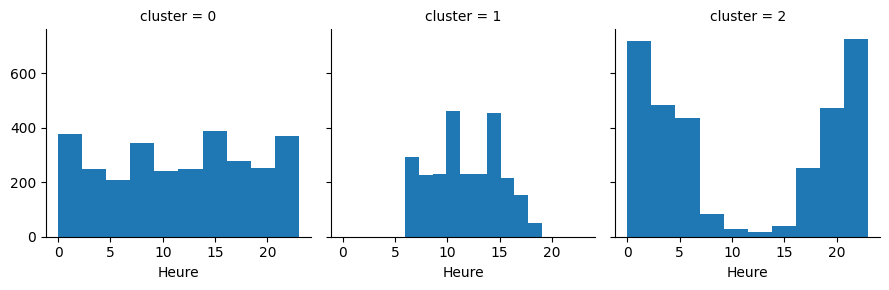

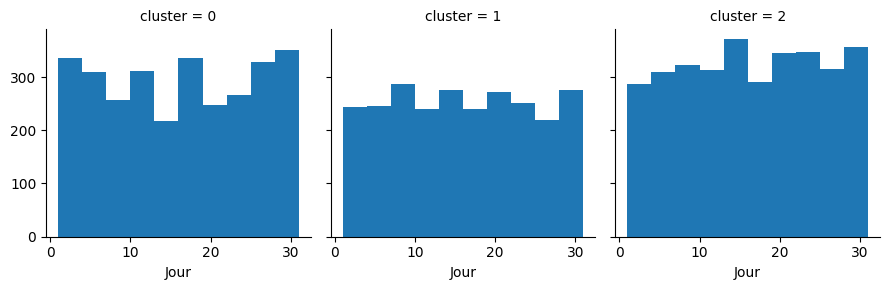

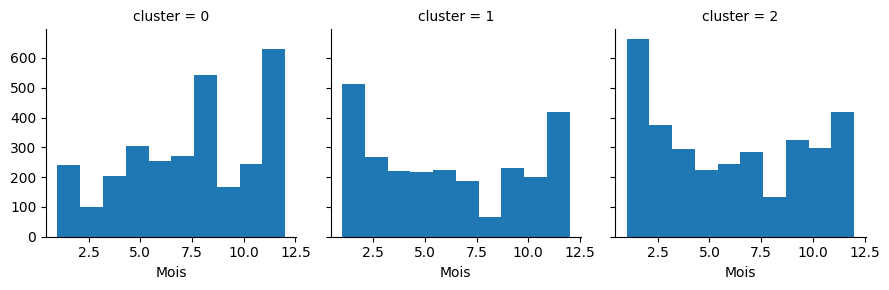

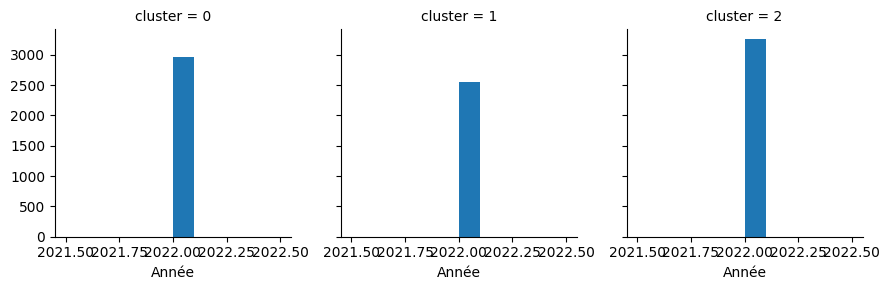

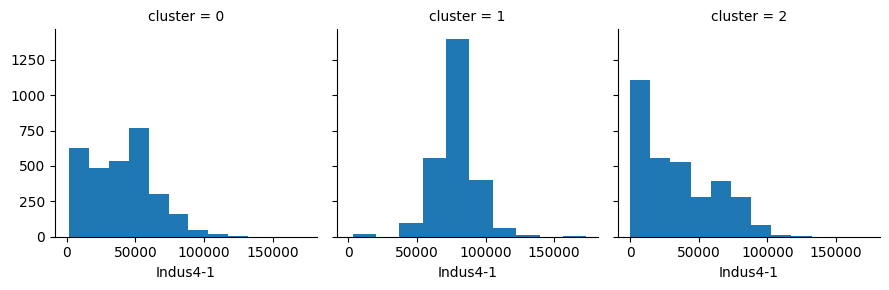

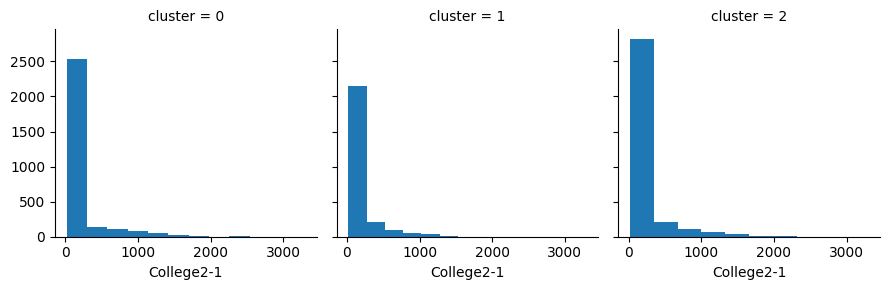

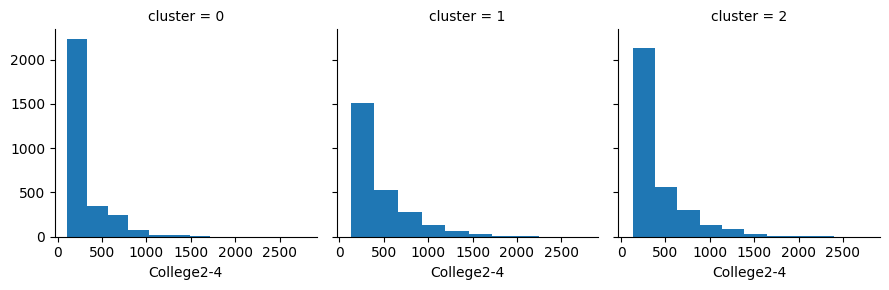

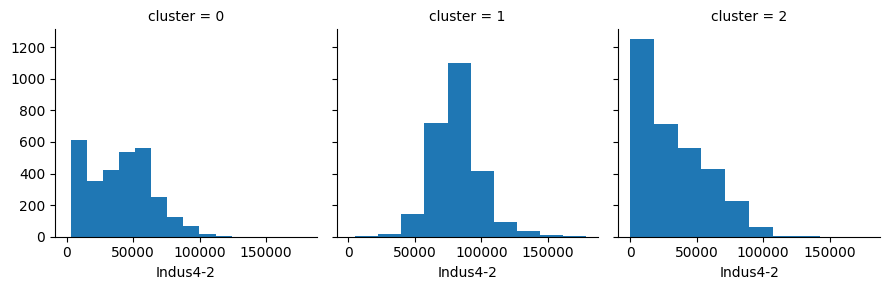

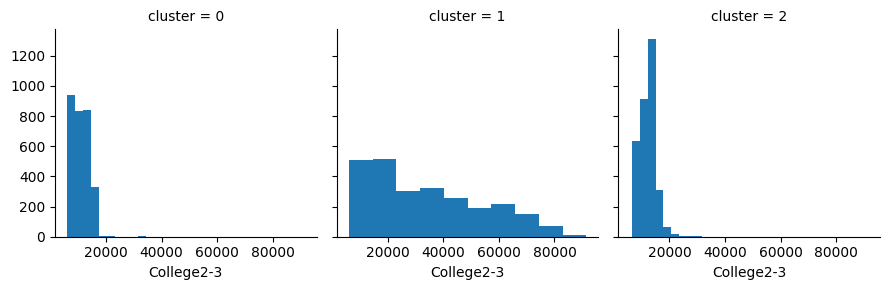

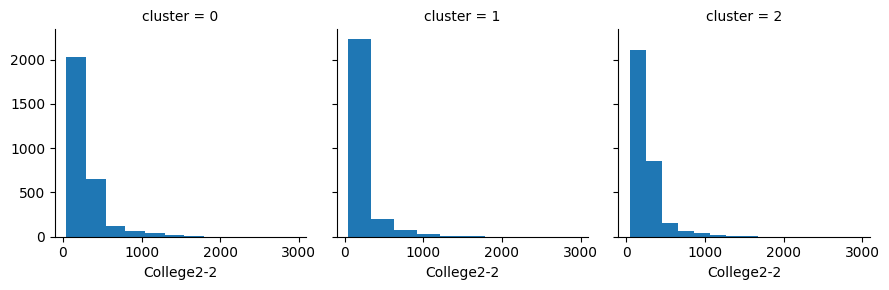

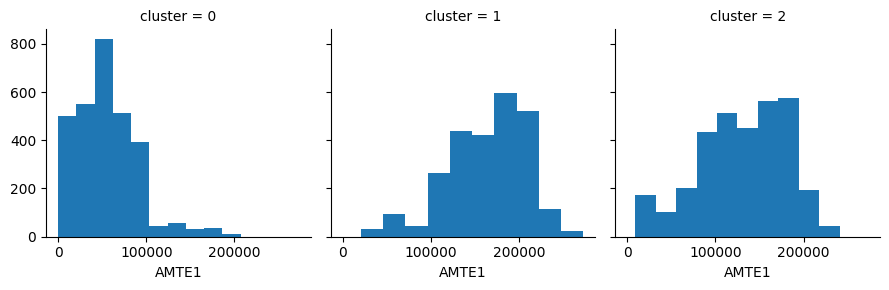

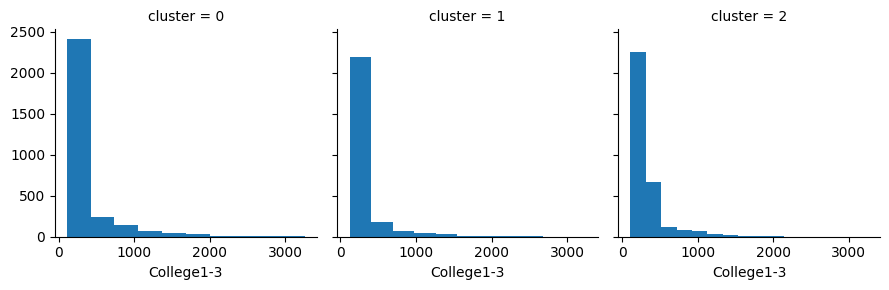

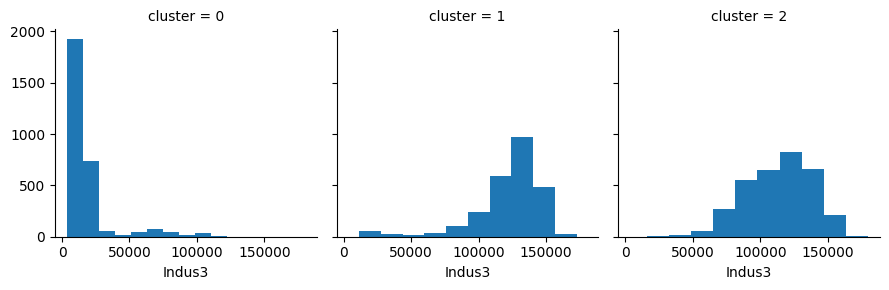

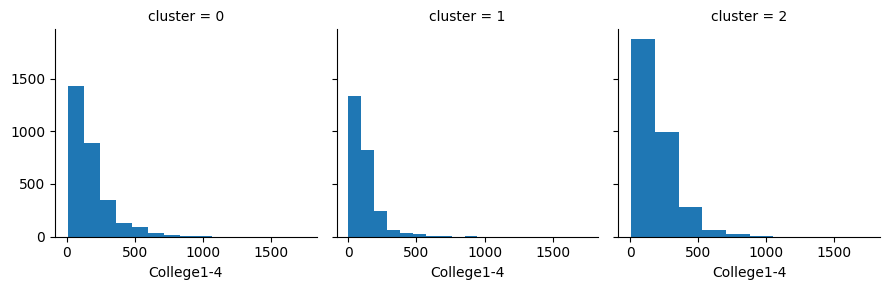

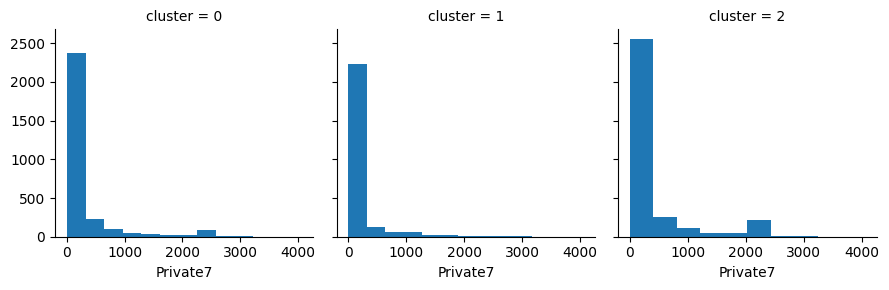

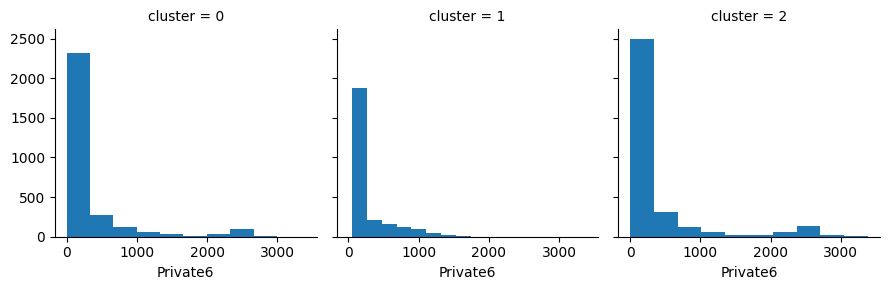

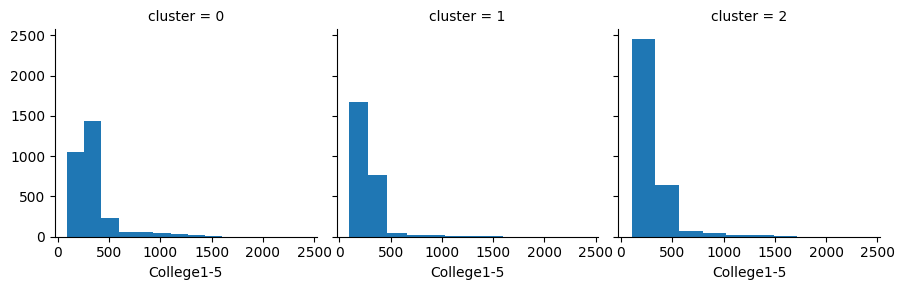

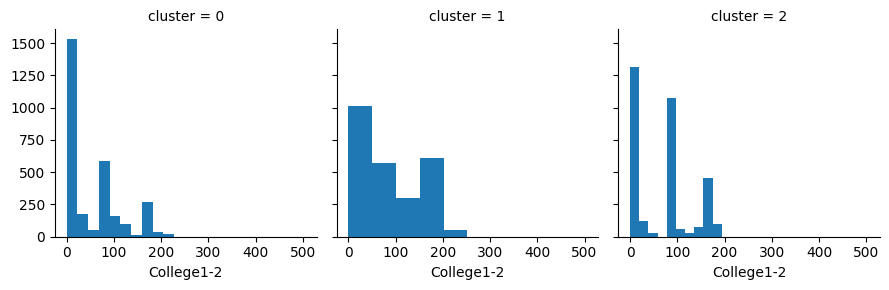

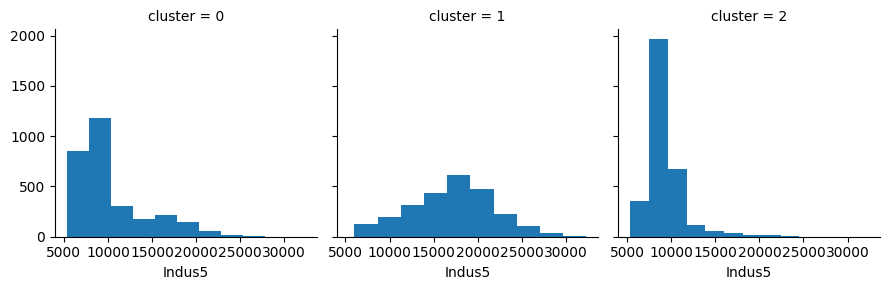

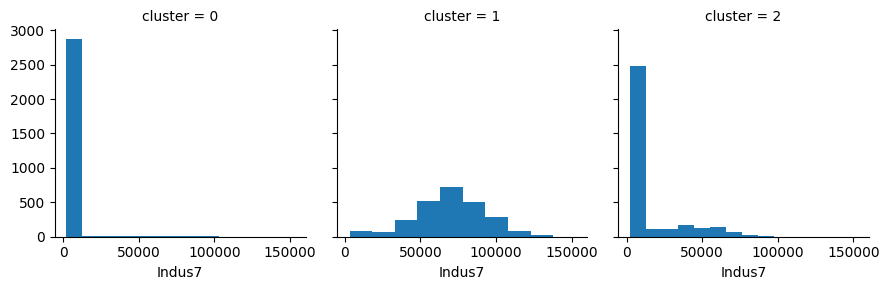

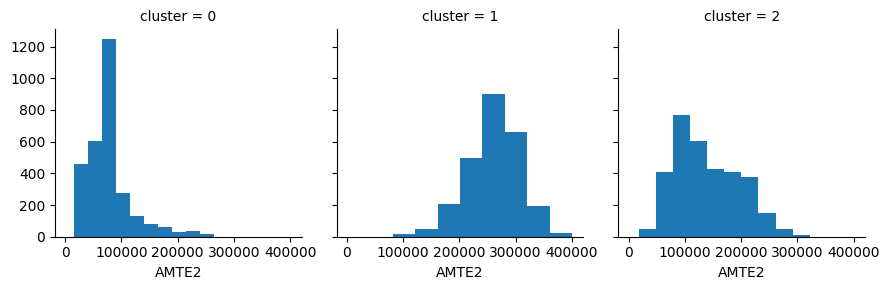

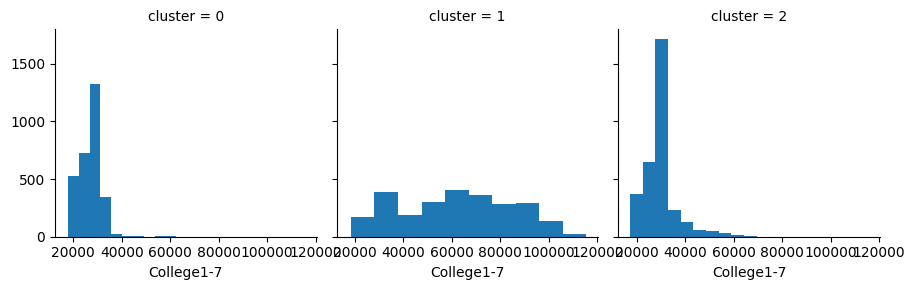

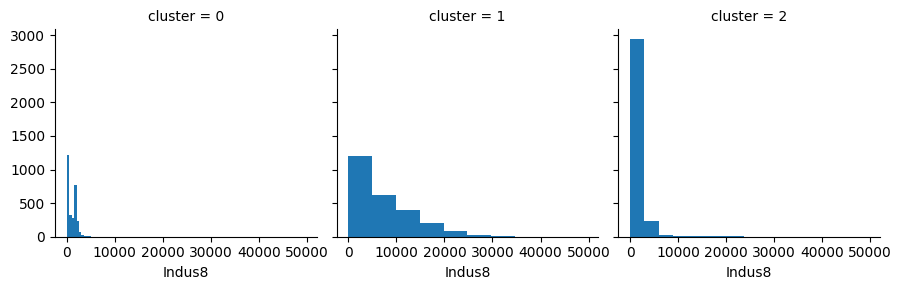

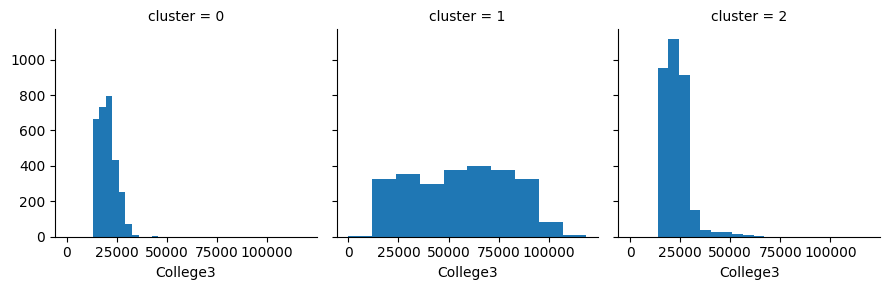

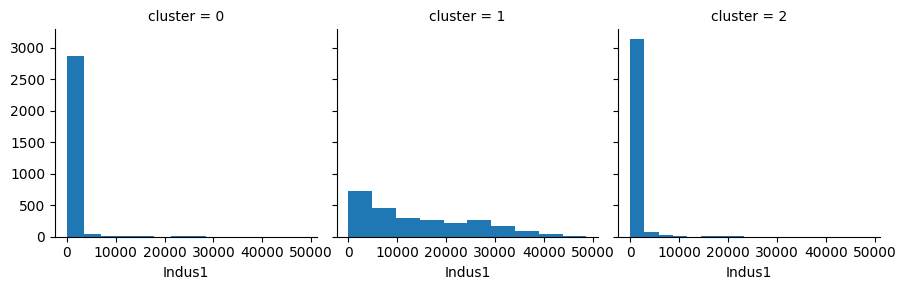

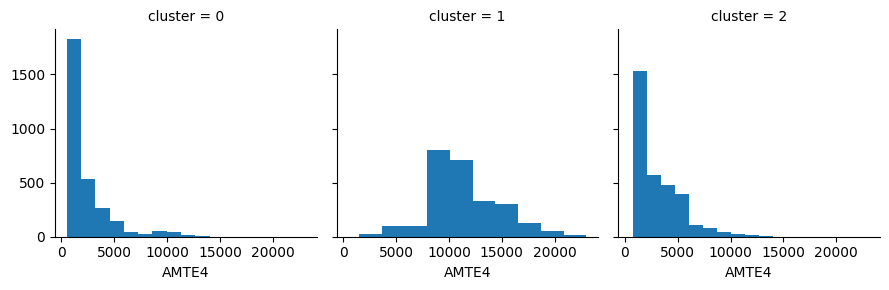

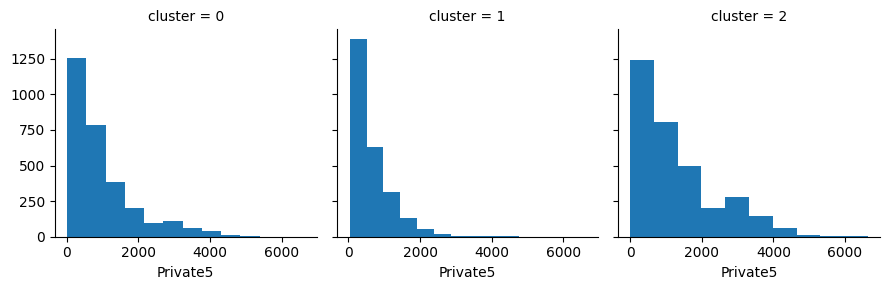

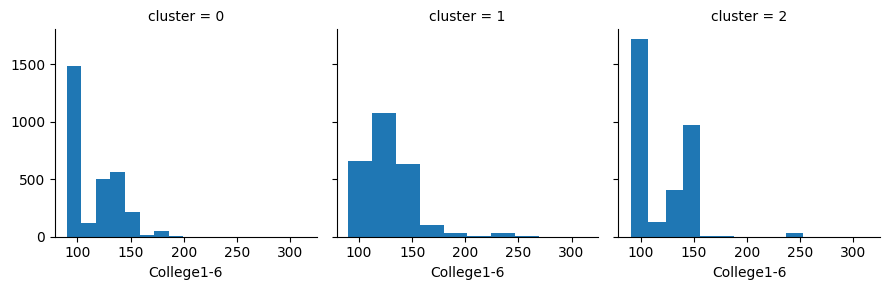

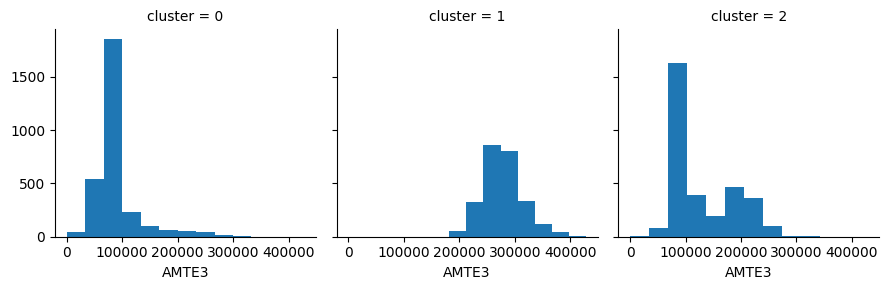

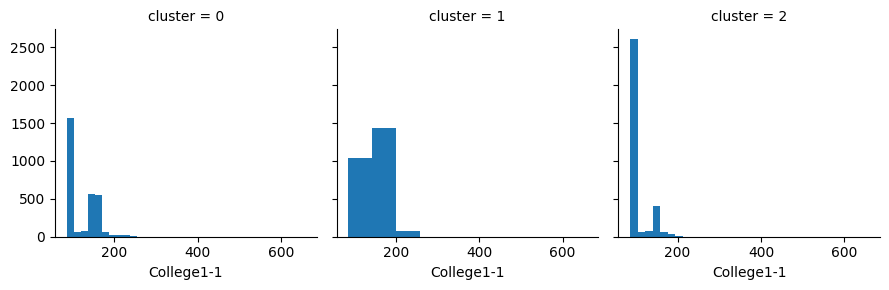

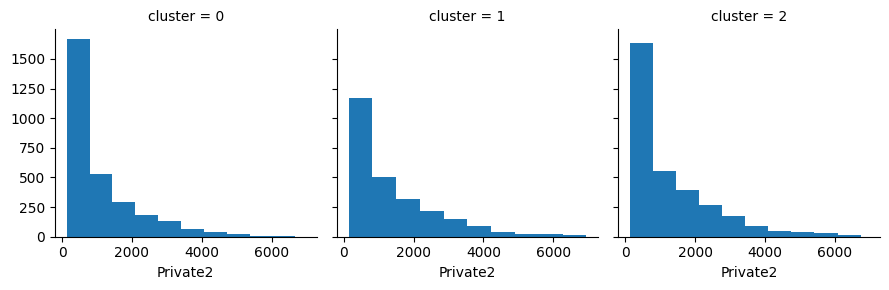

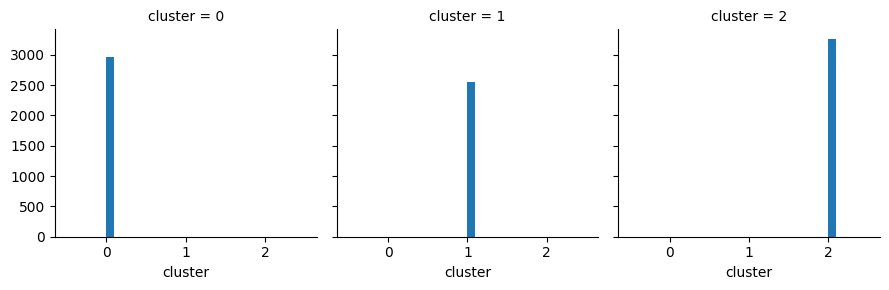

In [9]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [22]:
grouped_data = clusters.groupby('cluster')

# Obtenez la liste des noms de colonnes (mesures) en excluant celles que vous ne voulez pas afficher
excluded_columns = ['Heure', 'Jour', 'Année', 'cluster', 'Mois']
columns = [col for col in clusters.columns if col not in excluded_columns]

# Boucle pour parcourir toutes les colonnes
for column in columns:
    print(f"Colonne : {column}")
    # Boucle pour calculer et afficher la moyenne de chaque colonne pour chaque cluster
    for cluster, cluster_data in grouped_data:
        column_mean = cluster_data[column].mean()
        print(f"La moyenne de la colonne {column} pour le cluster {cluster} est de {column_mean:.2f}")

Colonne : Indus4-1
La moyenne de la colonne Indus4-1 pour le cluster 0 est de 39628.64
La moyenne de la colonne Indus4-1 pour le cluster 1 est de 77978.51
La moyenne de la colonne Indus4-1 pour le cluster 2 est de 34375.27
Colonne : College2-1
La moyenne de la colonne College2-1 pour le cluster 0 est de 206.91
La moyenne de la colonne College2-1 pour le cluster 1 est de 196.89
La moyenne de la colonne College2-1 pour le cluster 2 est de 216.85
Colonne : College2-4
La moyenne de la colonne College2-4 pour le cluster 0 est de 300.87
La moyenne de la colonne College2-4 pour le cluster 1 est de 431.15
La moyenne de la colonne College2-4 pour le cluster 2 est de 388.68
Colonne : Indus4-2
La moyenne de la colonne Indus4-2 pour le cluster 0 est de 39992.81
La moyenne de la colonne Indus4-2 pour le cluster 1 est de 81339.29
La moyenne de la colonne Indus4-2 pour le cluster 2 est de 32723.66
Colonne : College2-3
La moyenne de la colonne College2-3 pour le cluster 0 est de 10748.36
La moyenne de